## Downloading the data

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib

matplotlib.rcParams['figure.figsize'] = 10,10


In [9]:
nyc_df = pd.read_csv('train.csv')
nyc_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...,...,...
30494,id3958766,1,2016-06-15 09:38:55,2016-06-15 09:53:33,1,-73.969635,40.761272,-73.956451,40.785568,N,878.0
30495,id1644800,1,2016-04-15 12:23:42,2016-04-15 12:28:23,2,-73.979141,40.766617,-73.984123,40.760281,N,281.0
30496,id2858717,1,2016-02-16 16:56:36,2016-02-16 17:09:02,1,-73.986252,40.752335,-74.006355,40.742344,N,746.0
30497,id2410242,2,2016-05-13 05:39:47,2016-05-13 06:03:22,1,-74.000877,40.727482,-73.954567,40.805092,N,1415.0


In [10]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30499 entries, 0 to 30498
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30499 non-null  object 
 1   vendor_id           30499 non-null  int64  
 2   pickup_datetime     30499 non-null  object 
 3   dropoff_datetime    30499 non-null  object 
 4   passenger_count     30499 non-null  int64  
 5   pickup_longitude    30499 non-null  float64
 6   pickup_latitude     30499 non-null  float64
 7   dropoff_longitude   30499 non-null  float64
 8   dropoff_latitude    30498 non-null  float64
 9   store_and_fwd_flag  30498 non-null  object 
 10  trip_duration       30498 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.6+ MB


In [11]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,30499.000000,30499.000000,30499.000000,30499.000000,30499.000000,30498.000000,30498.000000
mean,1.531001,1.670350,-73.973410,40.751356,-73.972957,40.751994,933.793888
std,0.499046,1.318061,0.037870,0.027915,0.037272,0.032654,2973.735815
min,1.000000,1.000000,-74.347069,40.599873,-74.379631,40.556324,2.000000
25%,1.000000,1.000000,-73.991692,40.737736,-73.991257,40.735864,394.000000
50%,2.000000,1.000000,-73.981636,40.754734,-73.979622,40.754759,659.000000
75%,2.000000,2.000000,-73.966866,40.768604,-73.962727,40.770262,1071.000000
max,2.000000,6.000000,-73.558289,40.882942,-72.711395,41.311520,86357.000000


In [12]:
test_df = pd.read_csv('test.csv')
test_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
37035,id0673650,2,2016-06-19 17:03:34,6,-73.994164,40.751160,-73.972931,40.752460,N
37036,id2523334,1,2016-06-19 17:03:06,1,-73.966080,40.794724,-73.974434,40.744186,N
37037,id3547323,1,2016-06-19 17:03:04,1,-73.996262,40.731968,-73.959671,40.720169,N
37038,id3291679,1,2016-06-19 17:02:31,1,-73.972404,40.786591,-73.955933,40.782887,N


## Data Preprocessing

We can see that the trip_duration field contains values in the range of 1-86390. So let's exclude the data that lies  outisde 2 standard deviations from the mean.

In [13]:
m = np.mean(nyc_df['trip_duration'])
std = np.std(nyc_df['trip_duration'])
nyc_df = nyc_df[nyc_df['trip_duration'] <= m + 2*std]
nyc_df = nyc_df[nyc_df['trip_duration'] >= m- 2*std]
nyc_df.trip_duration

0         455.0
1         663.0
2        2124.0
3         429.0
4         435.0
          ...  
30493     706.0
30494     878.0
30495     281.0
30496     746.0
30497    1415.0
Name: trip_duration, Length: 30454, dtype: float64

In [14]:
print(min(nyc_df['dropoff_latitude']))
print(max(nyc_df['dropoff_latitude']))
print(min(nyc_df['dropoff_longitude']))
print(max(nyc_df['dropoff_longitude']))

40.55632400512695
41.08654022216797
-74.37963104248048
-73.4439468383789


Now looking into the longitude the coordinates lies between (-74.53,-72.71) and the latitude coordinates lies between (40.44,41.09).
But the pickup_latitude and pickup_longitude and dropoff_latitude and dropoff_laongitude lies outside this range. So let's clean them.

In [15]:
nyc_df = nyc_df[nyc_df['dropoff_latitude']<=41.09]
nyc_df = nyc_df[nyc_df['dropoff_latitude']>=40.44]
nyc_df = nyc_df[nyc_df['dropoff_longitude']<=-73.33]
nyc_df = nyc_df[nyc_df['dropoff_longitude']>=-74.53]


nyc_df = nyc_df[nyc_df['pickup_latitude']<=41.09]
nyc_df = nyc_df[nyc_df['pickup_latitude']>=40.44]
nyc_df = nyc_df[nyc_df['pickup_longitude']<=-73.33]
nyc_df = nyc_df[nyc_df['pickup_longitude']>=-74.53]

In [16]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,30454.000000,30454.000000,30454.000000,30454.000000,30454.000000,30454.000000,30454.000000
mean,1.530407,1.669699,-73.973441,40.751371,-73.973014,40.751984,831.550207
std,0.499083,1.317500,0.037794,0.027890,0.036525,0.032497,651.510983
min,1.000000,1.000000,-74.347069,40.599873,-74.379631,40.556324,2.000000
25%,1.000000,1.000000,-73.991692,40.737753,-73.991257,40.735867,394.000000
50%,2.000000,1.000000,-73.981636,40.754742,-73.979622,40.754782,658.000000
75%,2.000000,2.000000,-73.966875,40.768608,-73.962730,40.770267,1068.000000
max,2.000000,6.000000,-73.558289,40.882942,-73.443947,41.086540,6875.000000


Now let's change the data type of pickup_datetime and dropoff_datetime fields as they may be useful later.

In [17]:
nyc_df['pickup_datetime'] = nyc_df['pickup_datetime'].astype('datetime64')
nyc_df['pickup_date'] = nyc_df['pickup_datetime'].dt.date
test_df['pickup_datetime'] = test_df['pickup_datetime'].astype('datetime64')
test_df['pickup_date'] = test_df['pickup_datetime'].dt.date
nyc_df['pickup_date']

0        2016-03-14
1        2016-06-12
2        2016-01-19
3        2016-04-06
4        2016-03-26
            ...    
30493    2016-04-29
30494    2016-06-15
30495    2016-04-15
30496    2016-02-16
30497    2016-05-13
Name: pickup_date, Length: 30454, dtype: object

In [18]:
nyc_df['dropoff_datetime'] = nyc_df['dropoff_datetime'].astype('datetime64')
nyc_df['dropoff_date'] = nyc_df['dropoff_datetime'].dt.date
nyc_df['dropoff_date']

0        2016-03-14
1        2016-06-12
2        2016-01-19
3        2016-04-06
4        2016-03-26
            ...    
30493    2016-04-29
30494    2016-06-15
30495    2016-04-15
30496    2016-02-16
30497    2016-05-13
Name: dropoff_date, Length: 30454, dtype: object

In [19]:
nyc_df['Month'] = nyc_df['pickup_datetime'].dt.month
test_df['Month'] = test_df['pickup_datetime'].dt.month
nyc_df['Month']

0        3
1        6
2        1
3        4
4        3
        ..
30493    4
30494    6
30495    4
30496    2
30497    5
Name: Month, Length: 30454, dtype: int64

In [20]:
nyc_df['Hour'] = nyc_df['pickup_datetime'].dt.hour
test_df['Hour'] = test_df['pickup_datetime'].dt.hour
nyc_df['Hour']

0        17
1         0
2        11
3        19
4        13
         ..
30493     9
30494     9
30495    12
30496    16
30497     5
Name: Hour, Length: 30454, dtype: int64

In [21]:
nyc_df['Year'] = nyc_df['pickup_datetime'].dt.year
nyc_df['Year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
30493    2016
30494    2016
30495    2016
30496    2016
30497    2016
Name: Year, Length: 30454, dtype: int64

## EDA

In [22]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'dropoff_date', 'Month', 'Hour',
       'Year'],
      dtype='object')

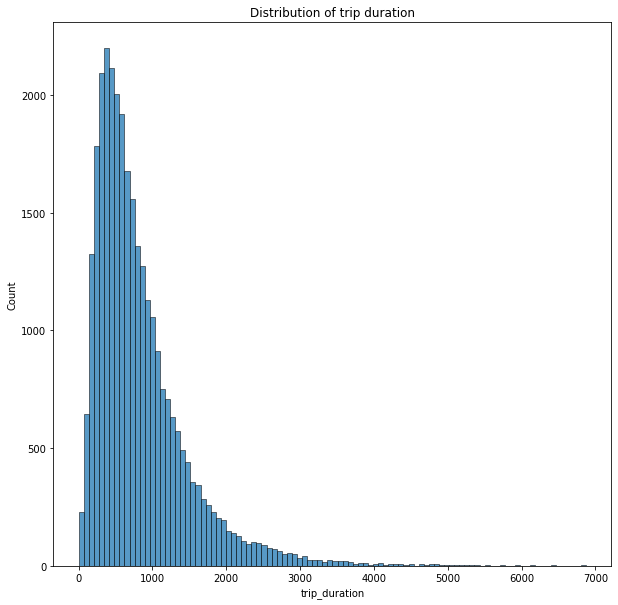

In [23]:
plt.title("Distribution of trip duration")
sns.histplot(nyc_df['trip_duration'],bins=100)

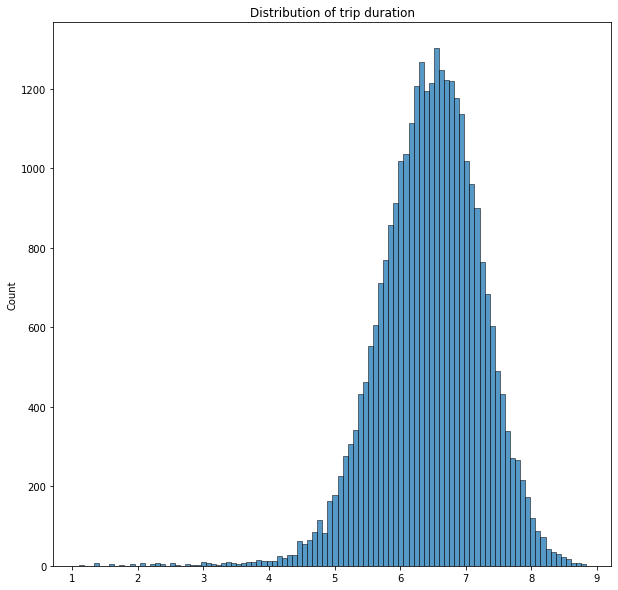

In [24]:
nyc_df['log_trip_duration']  = np.log(nyc_df['trip_duration'].values+1)
plt.title('Distribution of trip duration')
sns.histplot(nyc_df['log_trip_duration'].values,bins=100)

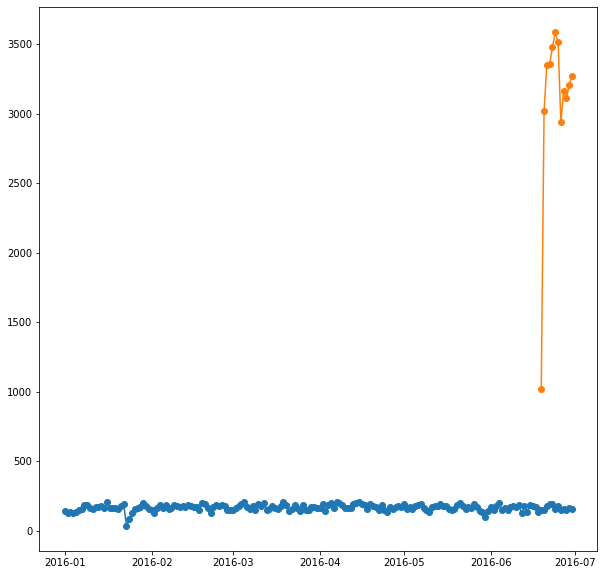

In [25]:
nyc_df.groupby('pickup_date').count()['id']
plt.plot(nyc_df.groupby('pickup_date').count()['id'], 'o-', label='train')
plt.plot(test_df.groupby('pickup_date').count()['id'], 'o-', label='test')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



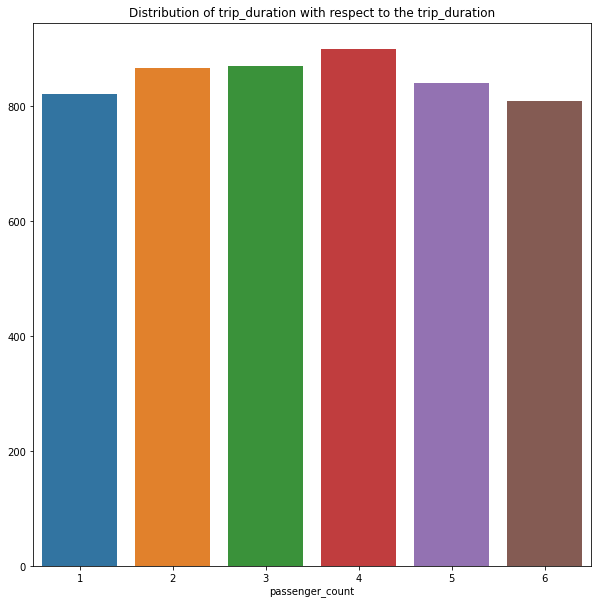

In [26]:
df = nyc_df.groupby('passenger_count')['trip_duration'].mean()
plt.title('Distribution of trip_duration with respect to the trip_duration')
sns.barplot(df.index,df.values)

We can see that the number of passengers has nothing to do with the trip_duration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


vendor_id
1    831.191945
2    831.867393
Name: trip_duration, dtype: float64


Text(0, 0.5, 'Time in Seconds')

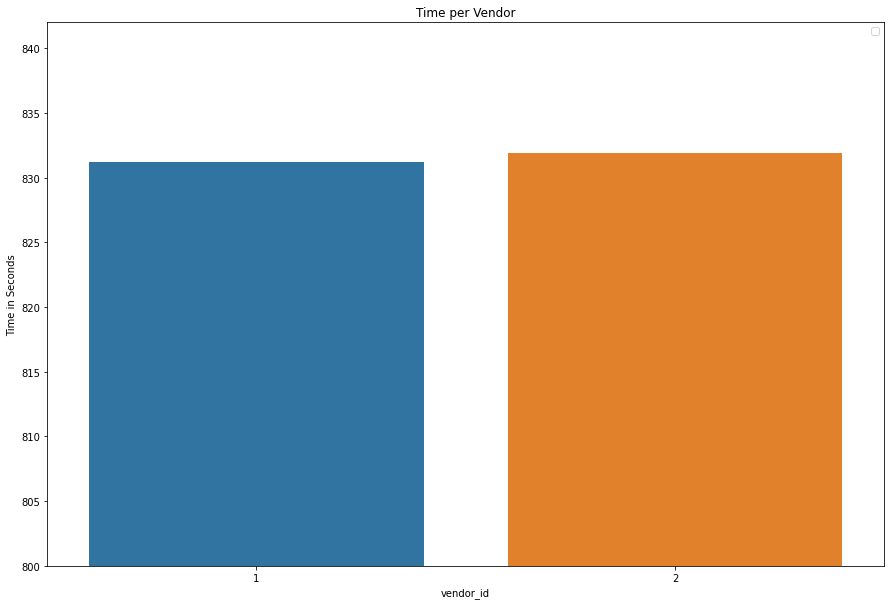

In [27]:
df = nyc_df.groupby('vendor_id')['trip_duration'].mean()
print(df)
plt.subplots(1,1,figsize=(15,10))
plt.ylim(ymin=800)
plt.ylim(ymax=842)
sns.barplot(df.index,df.values)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')

It doesn't seem to be like the trip_duration differs between the vendors.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



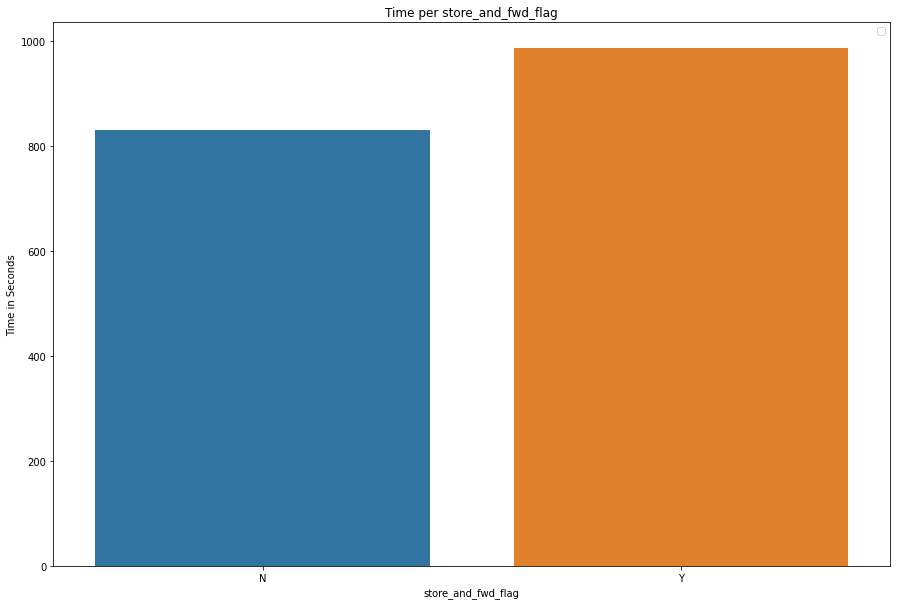

In [28]:
df = nyc_df.groupby('store_and_fwd_flag')['trip_duration'].mean()
plt.subplots(1,1,figsize=(15,10))
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(df.index,df.values)

So it would seem that the store_and_fwd_flag discriminates well between travel times. Clearly there is a slight skew in the data where some of the vendor employees didn't record their travel times accurately.

## Splitting the data

Since we need data to train, validate and test them let's split the data using `train_test_split` from sklearn module

Refernce:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [29]:
from sklearn.model_selection import train_test_split
train_val_df , test_df = train_test_split(nyc_df,test_size=0.2,random_state=42)
train_df , val_df = train_test_split(train_val_df,test_size=0.25,random_state=42)

In [30]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,Month,Hour,Year,log_trip_duration
17338,id3689545,2,2016-01-01 18:48:17,2016-01-01 19:04:56,1,-73.975029,40.759354,-73.990715,40.750275,N,999.0,2016-01-01,2016-01-01,1,18,2016,6.907755
8175,id1014973,2,2016-02-21 12:34:57,2016-02-21 12:43:38,1,-73.951912,40.786228,-73.952362,40.803272,N,521.0,2016-02-21,2016-02-21,2,12,2016,6.257668
14981,id3810930,1,2016-06-20 20:11:49,2016-06-20 20:26:08,1,-73.966820,40.760796,-73.991730,40.744148,N,859.0,2016-06-20,2016-06-20,6,20,2016,6.756932
28176,id1246654,2,2016-06-01 08:12:40,2016-06-01 08:17:24,1,-73.996391,40.753201,-74.004707,40.741829,N,284.0,2016-06-01,2016-06-01,6,8,2016,5.652489
25595,id3639719,1,2016-03-25 09:57:42,2016-03-25 10:08:31,1,-74.001122,40.736221,-74.000954,40.723099,N,649.0,2016-03-25,2016-03-25,3,9,2016,6.476972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,id1646673,2,2016-05-12 23:58:30,2016-05-13 00:22:38,1,-73.789825,40.646954,-73.989845,40.600548,N,1448.0,2016-05-12,2016-05-13,5,23,2016,7.278629
20579,id3796105,1,2016-04-14 04:12:53,2016-04-14 04:28:36,1,-73.986778,40.747719,-73.871071,40.774258,N,943.0,2016-04-14,2016-04-14,4,4,2016,6.850126
14332,id0853630,1,2016-02-20 22:07:34,2016-02-20 22:13:22,1,-73.981567,40.772785,-73.961739,40.773720,N,348.0,2016-02-20,2016-02-20,2,22,2016,5.855072
21811,id1649463,1,2016-02-22 15:08:06,2016-02-22 15:15:50,1,-73.977699,40.684517,-73.995338,40.716061,N,464.0,2016-02-22,2016-02-22,2,15,2016,6.142037


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18272 entries, 17338 to 3271
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  18272 non-null  object        
 1   vendor_id           18272 non-null  int64         
 2   pickup_datetime     18272 non-null  datetime64[ns]
 3   dropoff_datetime    18272 non-null  datetime64[ns]
 4   passenger_count     18272 non-null  int64         
 5   pickup_longitude    18272 non-null  float64       
 6   pickup_latitude     18272 non-null  float64       
 7   dropoff_longitude   18272 non-null  float64       
 8   dropoff_latitude    18272 non-null  float64       
 9   store_and_fwd_flag  18272 non-null  object        
 10  trip_duration       18272 non-null  float64       
 11  pickup_date         18272 non-null  object        
 12  dropoff_date        18272 non-null  object        
 13  Month               18272 non-null  int64  

### Identifying input and output columns

In [32]:
train_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Month,Hour,Year,log_trip_duration
vendor_id,1.000000,0.293225,0.009506,0.005113,-0.003012,0.018817,-0.002877,-0.004386,0.009644,NaN,0.002484
passenger_count,0.293225,1.000000,0.002393,-0.006830,-0.008039,0.002513,0.010793,-0.004336,0.008988,NaN,0.020227
pickup_longitude,0.009506,0.002393,1.000000,-0.136015,0.296078,0.053649,0.333565,0.017248,0.011534,NaN,0.186674
pickup_latitude,0.005113,-0.006830,-0.136015,1.000000,0.057678,0.425166,-0.226954,-0.013104,0.013319,NaN,-0.159185
dropoff_longitude,-0.003012,-0.008039,0.296078,0.057678,1.000000,0.104744,0.227505,0.016762,-0.035576,NaN,0.134866
dropoff_latitude,0.018817,0.002513,0.053649,0.425166,0.104744,1.000000,-0.181113,-0.007400,0.021453,NaN,-0.136162
trip_duration,-0.002877,0.010793,0.333565,-0.226954,0.227505,-0.181113,1.000000,0.065593,0.032819,NaN,0.862182
Month,-0.004386,-0.004336,0.017248,-0.013104,0.016762,-0.007400,0.065593,1.000000,0.009177,NaN,0.053088
Hour,0.009644,0.008988,0.011534,0.013319,-0.035576,0.021453,0.032819,0.009177,1.000000,NaN,0.051939
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
input_col = ['vendor_id','pickup_datetime','passenger_count','pickup_latitude','dropoff_latitude','dropoff_longitude','store_and_fwd_flag']
target_col = 'trip_duration'

In [34]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()

In [35]:
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()

In [36]:
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()

In [37]:
numeric_col = train_inputs.select_dtypes(include=np.number).columns.tolist()
cate_col = train_inputs.select_dtypes('object').columns.tolist()

In [38]:
train_inputs[numeric_col]

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude
17338,2,1,40.759354,40.750275,-73.990715
8175,2,1,40.786228,40.803272,-73.952362
14981,1,1,40.760796,40.744148,-73.991730
28176,2,1,40.753201,40.741829,-74.004707
25595,1,1,40.736221,40.723099,-74.000954
...,...,...,...,...,...
19506,2,1,40.646954,40.600548,-73.989845
20579,1,1,40.747719,40.774258,-73.871071
14332,1,1,40.772785,40.773720,-73.961739
21811,1,1,40.684517,40.716061,-73.995338


In [39]:
train_inputs[cate_col]

,store_and_fwd_flag
17338,N
8175,N
14981,N
28176,N
25595,N
...,...
19506,N
20579,N
14332,N
21811,N


### Imputing missing values


Imputing is an technique in which the fill in the missing numeric values based on some category. Here if we want we'll use SimpleImputer form sklearn moduel

Reference:https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [40]:
train_inputs[numeric_col].isna().sum()

vendor_id            0
passenger_count      0
pickup_latitude      0
dropoff_latitude     0
dropoff_longitude    0
dtype: int64

In [41]:
val_inputs[numeric_col].isna().sum()

vendor_id            0
passenger_count      0
pickup_latitude      0
dropoff_latitude     0
dropoff_longitude    0
dtype: int64

In [42]:
test_inputs[numeric_col].isna().sum()

vendor_id            0
passenger_count      0
pickup_latitude      0
dropoff_latitude     0
dropoff_longitude    0
dtype: int64

It seems like there are no missing values in the train,validation and test datasets.

### Scaling numeric values

Now let's scale the numeric values to in range of (0,1) 

Reference:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [43]:
train_inputs[numeric_col].describe()

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude
count,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000
mean,1.530265,1.673873,40.751378,40.751914,-73.973290
std,0.499097,1.325714,0.027798,0.032050,0.036435
min,1.000000,1.000000,40.599873,40.567341,-74.379631
25%,1.000000,1.000000,40.737709,40.736263,-73.991318
50%,2.000000,1.000000,40.754482,40.754726,-73.979702
75%,2.000000,2.000000,40.768549,40.770107,-73.962868
max,2.000000,6.000000,40.882942,41.060986,-73.549583


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
scaler.fit(train_inputs[numeric_col])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
train_inputs[numeric_col] = scaler.transform(train_inputs[numeric_col])
val_inputs[numeric_col]  = scaler.transform(val_inputs[numeric_col])
test_inputs[numeric_col] = scaler.transform(test_inputs[numeric_col])

In [47]:
train_inputs[numeric_col].describe()

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude
count,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000
mean,0.530265,0.134775,0.535225,0.373899,0.489540
std,0.499097,0.265143,0.098203,0.064925,0.043895
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.486935,0.342194,0.467821
50%,1.000000,0.000000,0.546190,0.379596,0.481815
75%,1.000000,0.200000,0.595883,0.410754,0.502096
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding categorical columns

Now are going to encode categorical columns using one hot encoder into one hot numeric array
Reference:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [49]:
encoder.fit(train_inputs[cate_col])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [50]:
enc_col = encoder.get_feature_names(cate_col).tolist()
enc_col

['store_and_fwd_flag_N', 'store_and_fwd_flag_Y']

In [51]:
train_inputs[enc_col] = encoder.transform(train_inputs[cate_col])
val_inputs[enc_col] = encoder.transform(val_inputs[cate_col])
test_inputs[enc_col] = encoder.transform(test_inputs[cate_col])

In [52]:
train_inputs[enc_col]

,store_and_fwd_flag_N,store_and_fwd_flag_Y
17338,1.0,0.0
8175,1.0,0.0
14981,1.0,0.0
28176,1.0,0.0
25595,1.0,0.0
...,...,...
19506,1.0,0.0
20579,1.0,0.0
14332,1.0,0.0
21811,1.0,0.0


In [53]:
val_inputs

,vendor_id,pickup_datetime,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude,store_and_fwd_flag,store_and_fwd_flag_N,store_and_fwd_flag_Y
2896,0.0,2016-02-29 18:20:00,0.0,0.470804,0.227632,0.460826,N,1.0,0.0
26443,0.0,2016-03-20 09:53:47,0.0,0.536123,0.434771,0.491369,N,1.0,0.0
16368,0.0,2016-05-18 04:16:46,0.0,0.569773,0.360918,0.479246,N,1.0,0.0
27568,1.0,2016-04-24 22:07:45,0.0,0.513079,0.540191,0.526729,N,1.0,0.0
2576,1.0,2016-04-25 19:49:56,0.8,0.571498,0.332512,0.474714,N,1.0,0.0
...,...,...,...,...,...,...,...,...,...
15171,0.0,2016-02-25 14:42:05,0.0,0.448379,0.358901,0.449529,N,1.0,0.0
18029,1.0,2016-05-23 18:08:48,0.0,0.439202,0.324676,0.464383,N,1.0,0.0
30242,1.0,2016-01-31 15:47:51,0.8,0.422815,0.399131,0.489623,N,1.0,0.0
17087,1.0,2016-06-25 23:14:19,0.0,0.533765,0.421418,0.517124,N,1.0,0.0


In [125]:
x_train = train_inputs[numeric_col + enc_col]
x_val = val_inputs[numeric_col+enc_col]
x_test = test_inputs[numeric_col + enc_col]

## Model

### Linear model

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. 
Reference:https://machinelearningmastery.com/linear-regression-for-machine-learning/

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
model.fit(x_train,train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model.predict(x_train)

array([ 713.61048716,  631.52345536,  720.45534032, ...,  726.00276752,
       1107.93074889,  866.61647762])

In [59]:
train_targets

17338     999.0
8175      521.0
14981     859.0
28176     284.0
25595     649.0
          ...  
19506    1448.0
20579     943.0
14332     348.0
21811     464.0
3271      828.0
Name: trip_duration, Length: 18272, dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model.predict(x_train),train_targets,squared=False)

604.3495311654826

In [61]:
mean_squared_error(model.predict(x_val),val_targets,squared=False)

618.026288458768

## XGBoost

XGBoost is an powerful approach for solving regresion models.Since we are dealing regression problems, we are now going to use xgboost model
Reference:https://xgboost.readthedocs.io/en/latest/

In [62]:
from xgboost import XGBRegressor
model =  XGBRegressor(n_jobs=-1,random_state=42)

In [63]:
model.fit(x_train,train_targets)

[06:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [64]:
model.predict(x_train)

array([649.6477 , 506.83832, 709.522  , ..., 604.83777, 657.58417,
       791.88135], dtype=float32)

In [65]:
mean_squared_error(model.predict(x_train),train_targets,squared=False)

444.07809490833785

In [66]:
mean_squared_error(model.predict(x_val),val_targets,squared=False)

473.88155630105257

Now let's visualize the model

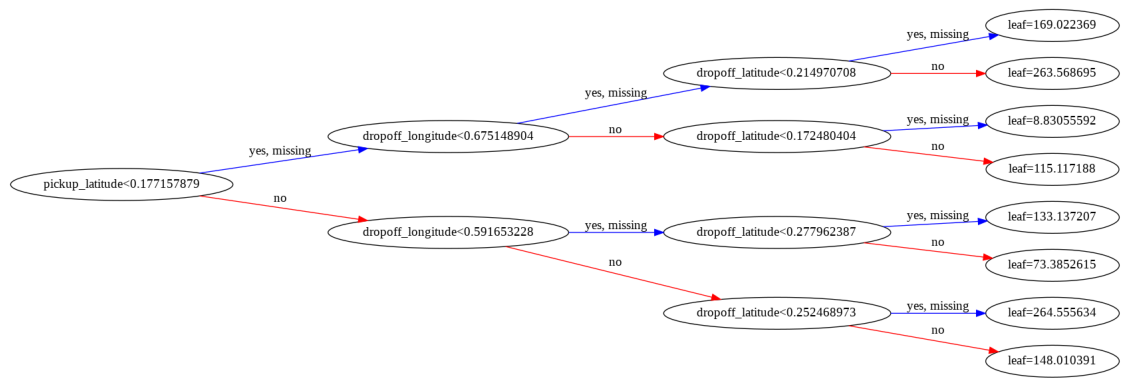

In [67]:
from xgboost import plot_tree
matplotlib.rcParams['figure.figsize']  = 20,20
plot_tree(model,rankdir='LR')

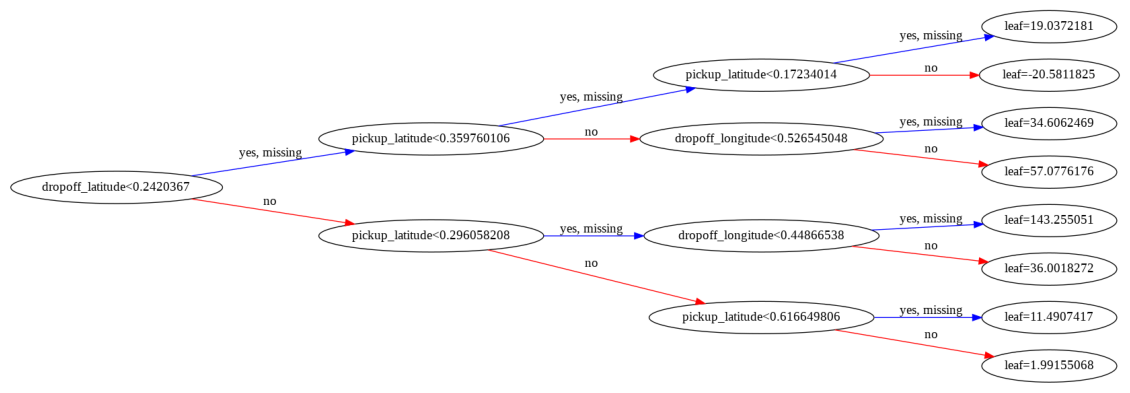

In [68]:
matplotlib.rcParams['figure.figsize']  = 20,20
plot_tree(model,rankdir='LR',num_trees=19)

In [69]:
trees = model.get_booster().get_dump()
print(trees[0])

0:[pickup_latitude<0.177157879] yes=1,no=2,missing=1
	1:[dropoff_longitude<0.675148904] yes=3,no=4,missing=3
		3:[dropoff_latitude<0.214970708] yes=7,no=8,missing=7
			7:leaf=169.022369
			8:leaf=263.568695
		4:[dropoff_latitude<0.172480404] yes=9,no=10,missing=9
			9:leaf=8.83055592
			10:leaf=115.117188
	2:[dropoff_longitude<0.591653228] yes=5,no=6,missing=5
		5:[dropoff_latitude<0.277962387] yes=11,no=12,missing=11
			11:leaf=133.137207
			12:leaf=73.3852615
		6:[dropoff_latitude<0.252468973] yes=13,no=14,missing=13
			13:leaf=264.555634
			14:leaf=148.010391



### Feature importance

Let's create a new data frame which contains the fields and their respective Importance given by the model

In [70]:
importance_df = pd.DataFrame({
    'Feature' : numeric_col+enc_col,
    'Importance':model.feature_importances_
}).sort_values('Importance',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



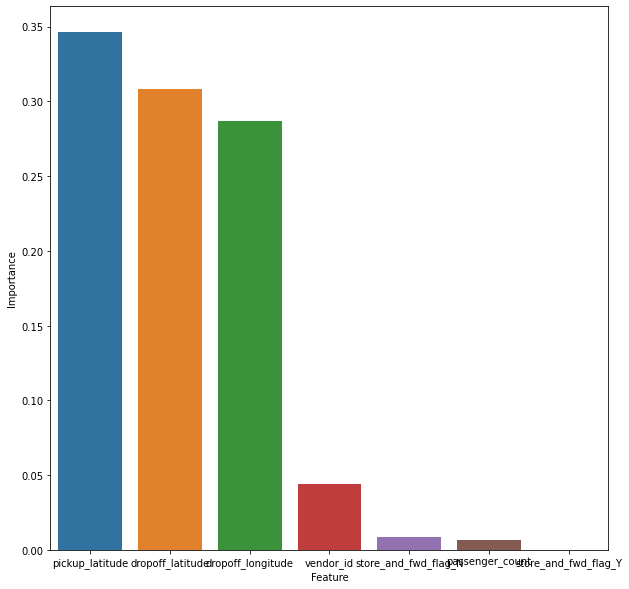

In [71]:
matplotlib.rcParams['figure.figsize'] = 10,10
sns.barplot(importance_df['Feature'],importance_df['Importance'])

We can see that dropoff_longitude has the most importance given by the model

## Hyperparameter tuning

Now we have created a model, next we have to tune the model using the parameters so that we can reduce the loss
Refer:https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

### max_depth

In [72]:
def test_param(**params):
  model = XGBRegressor(n_jobs=-1,random_state=42,**params)
  model.fit(x_train,train_targets)
  train_rmse = mean_squared_error(model.predict(x_train),train_targets,squared=False)
  val_rmse = mean_squared_error(model.predict(x_val),val_targets,squared=False)
  print(train_rmse," ",val_rmse)
  return train_rmse,val_rmse

In [73]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_param(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [74]:
test_param(max_depth=2)

[06:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
468.7094763333306   491.78961797446334


(468.7094763333306, 491.78961797446334)

In [75]:
test_param(max_depth=5)

[06:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
397.94256618393393   455.38227980020275


(397.94256618393393, 455.38227980020275)

In [76]:
test_param(max_depth=10)

[06:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
281.1646582831885   464.39189844900494


(281.1646582831885, 464.39189844900494)

[06:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
645.411023969975   663.9162697193025
[06:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
281.1646582831885   464.39189844900494
[06:04:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
66.64937322907319   492.43007587106325
[06:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
9.668612354894695   494.58086361349655
[06:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3.1422412747779402   494.58598767179046
[06:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3.0994459543965087   492.5709955952639
[06:0

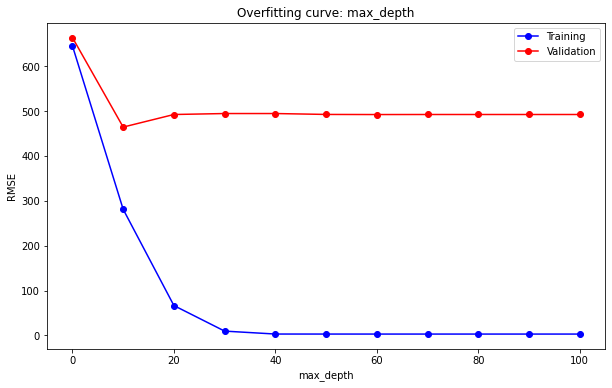

In [78]:
test_param_and_plot('max_depth',[x for x in range(0,110,10)])

### n_estimators

In [83]:
test_param(n_estimators=10)

[06:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
622.9825352675508   644.7078678330442


(622.9825352675508, 644.7078678330442)

In [84]:
test_param(n_estimators=20)

[06:08:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
534.3841246483383   557.3750793831289


(534.3841246483383, 557.3750793831289)

In [85]:
test_param(n_estimators=30)

[06:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
506.9096707522515   531.0021632453652


(506.9096707522515, 531.0021632453652)

In [86]:
test_param(n_estimators=40)

[06:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
484.65023377367004   509.760975626037


(484.65023377367004, 509.760975626037)

In [87]:
test_param(n_estimators=50)

[06:08:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
473.31530946893184   499.3960820887394


(473.31530946893184, 499.3960820887394)

In [90]:
test_param(n_estimators=50,max_depth=30)

[06:10:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
44.90974730589435   492.5335781549812


(44.90974730589435, 492.5335781549812)

In [91]:
test_param(n_estimators=60,max_depth=30)

[06:11:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
32.12985450683002   493.1353049846066


(32.12985450683002, 493.1353049846066)

[06:09:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
444.07809490833785   473.88155630105257
[06:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
422.93339691025966   460.0466788640275
[06:09:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
412.63319623777676   457.34726877999066
[06:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
403.89111732056296   456.76051956159813
[06:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
397.44160477480017   456.44389521276287
[06:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
390.54483303103495   457.4777134208092


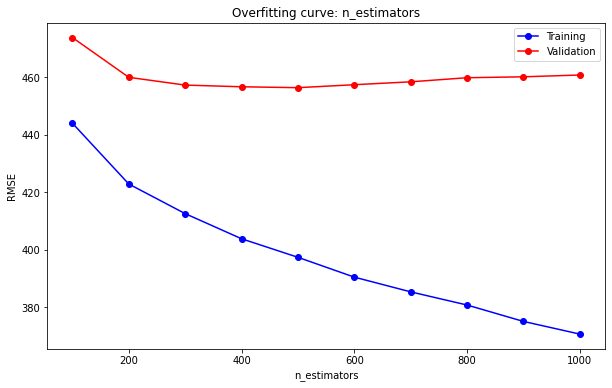

In [89]:
test_param_and_plot('n_estimators',[x for x in range(100,1100,100)])

### learning_rate

In [92]:
test_param(learning_rate=0.01)

[06:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
630.8176011986397   652.2978201501717


(630.8176011986397, 652.2978201501717)

In [93]:
test_param(learning_rate=0.1)

[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
444.07809490833785   473.88155630105257


(444.07809490833785, 473.88155630105257)

In [94]:
test_param(learning_rate=0.3)

[06:12:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
410.1511811671185   462.5996023502818


(410.1511811671185, 462.5996023502818)

In [95]:
test_param(learning_rate=0.5)

[06:12:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
396.6640842669445   467.25891433942377


(396.6640842669445, 467.25891433942377)

In [102]:
test_param(learning_rate=0.9)

[06:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
381.75444596753147   481.2259670845575


(381.75444596753147, 481.2259670845575)

In [108]:
test_param(learning_rate=1)

[06:17:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
380.5292046143372   489.17613652303794


(380.5292046143372, 489.17613652303794)

In [109]:
test_param(learning_rate=1,max_depth=60,n_estimators=60)

[06:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.108128279024746   558.4712077997586


(2.108128279024746, 558.4712077997586)

In [110]:
test_param(learning_rate=1,max_depth=60,n_estimators=100)

[06:17:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.1081282792147418   558.4712058272908


(2.1081282792147418, 558.4712058272908)

### booster

In [101]:
test_param(booster='gblinear')

[06:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
645.2221675246965   663.7754301069033


(645.2221675246965, 663.7754301069033)

In [111]:
test_param(booster='gblinear',max_depth=60,n_estimators=100,learning_rate=1)

[06:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
644.9351284921279   663.4404576019873


(644.9351284921279, 663.4404576019873)

In [112]:
test_param(booster='gbtree',max_depth=60,n_estimators=100,learning_rate=1)

[06:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.1081282792147418   558.4712058272908


(2.1081282792147418, 558.4712058272908)

## Putting it together

In [117]:
model = XGBRegressor(n_jobs=-1,random_state=42,max_depth=60,n_estimaotrs=100,learning_rate=0.9,booster='gbtree')

In [119]:
model.fit(x_train,train_targets)

[06:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.9, max_delta_step=0,
             max_depth=60, min_child_weight=1, missing=None, n_estimaotrs=100,
             n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [123]:
mean_squared_error(model.predict(x_train),train_targets,squared=False)

2.1081282381957456

In [124]:
mean_squared_error(model.predict(x_val),val_targets,squared=False)

556.6672079327209

In [127]:
mean_squared_error(model.predict(x_test),test_targets,squared=False)

542.7085676521616

## Making predictions on new inputs

Let's  define a helper function which takes in a model and a input and then computes the trip duration

In [166]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_col] = imputer.transform(input_df[numeric_col])
    input_df[numeric_col] = scaler.transform(input_df[numeric_col])
    input_df[enc_col] = encoder.transform(input_df[cate_col])
    X_input = input_df[numeric_col + enc_col]
    pred = model.predict(X_input)[0]
    return pred

In [167]:
inp = {
    'vendor_id':1,
    'pickup_dateime':'2016-04-01 13:39:13.964110080',
    'passenger_count':6,
    'pickup_latitude':40.7,
    'dropoff_longitude':-73,
    'dropoff_latitude':40.7,
    'store_and_fwd_flag':'N',
    'store_and_fwd_flag_N':1,
    'store_and_fwd_flag_Y':0
}
predict_input(model,inp)

318.1897

So from the given input it's seen that the predicted durationn time 318.1897 seconds